<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    int64 
 7   Neighborhood  128 non-null    object
dtypes: int64(7), object(1)
memory usage: 8.1+ KB


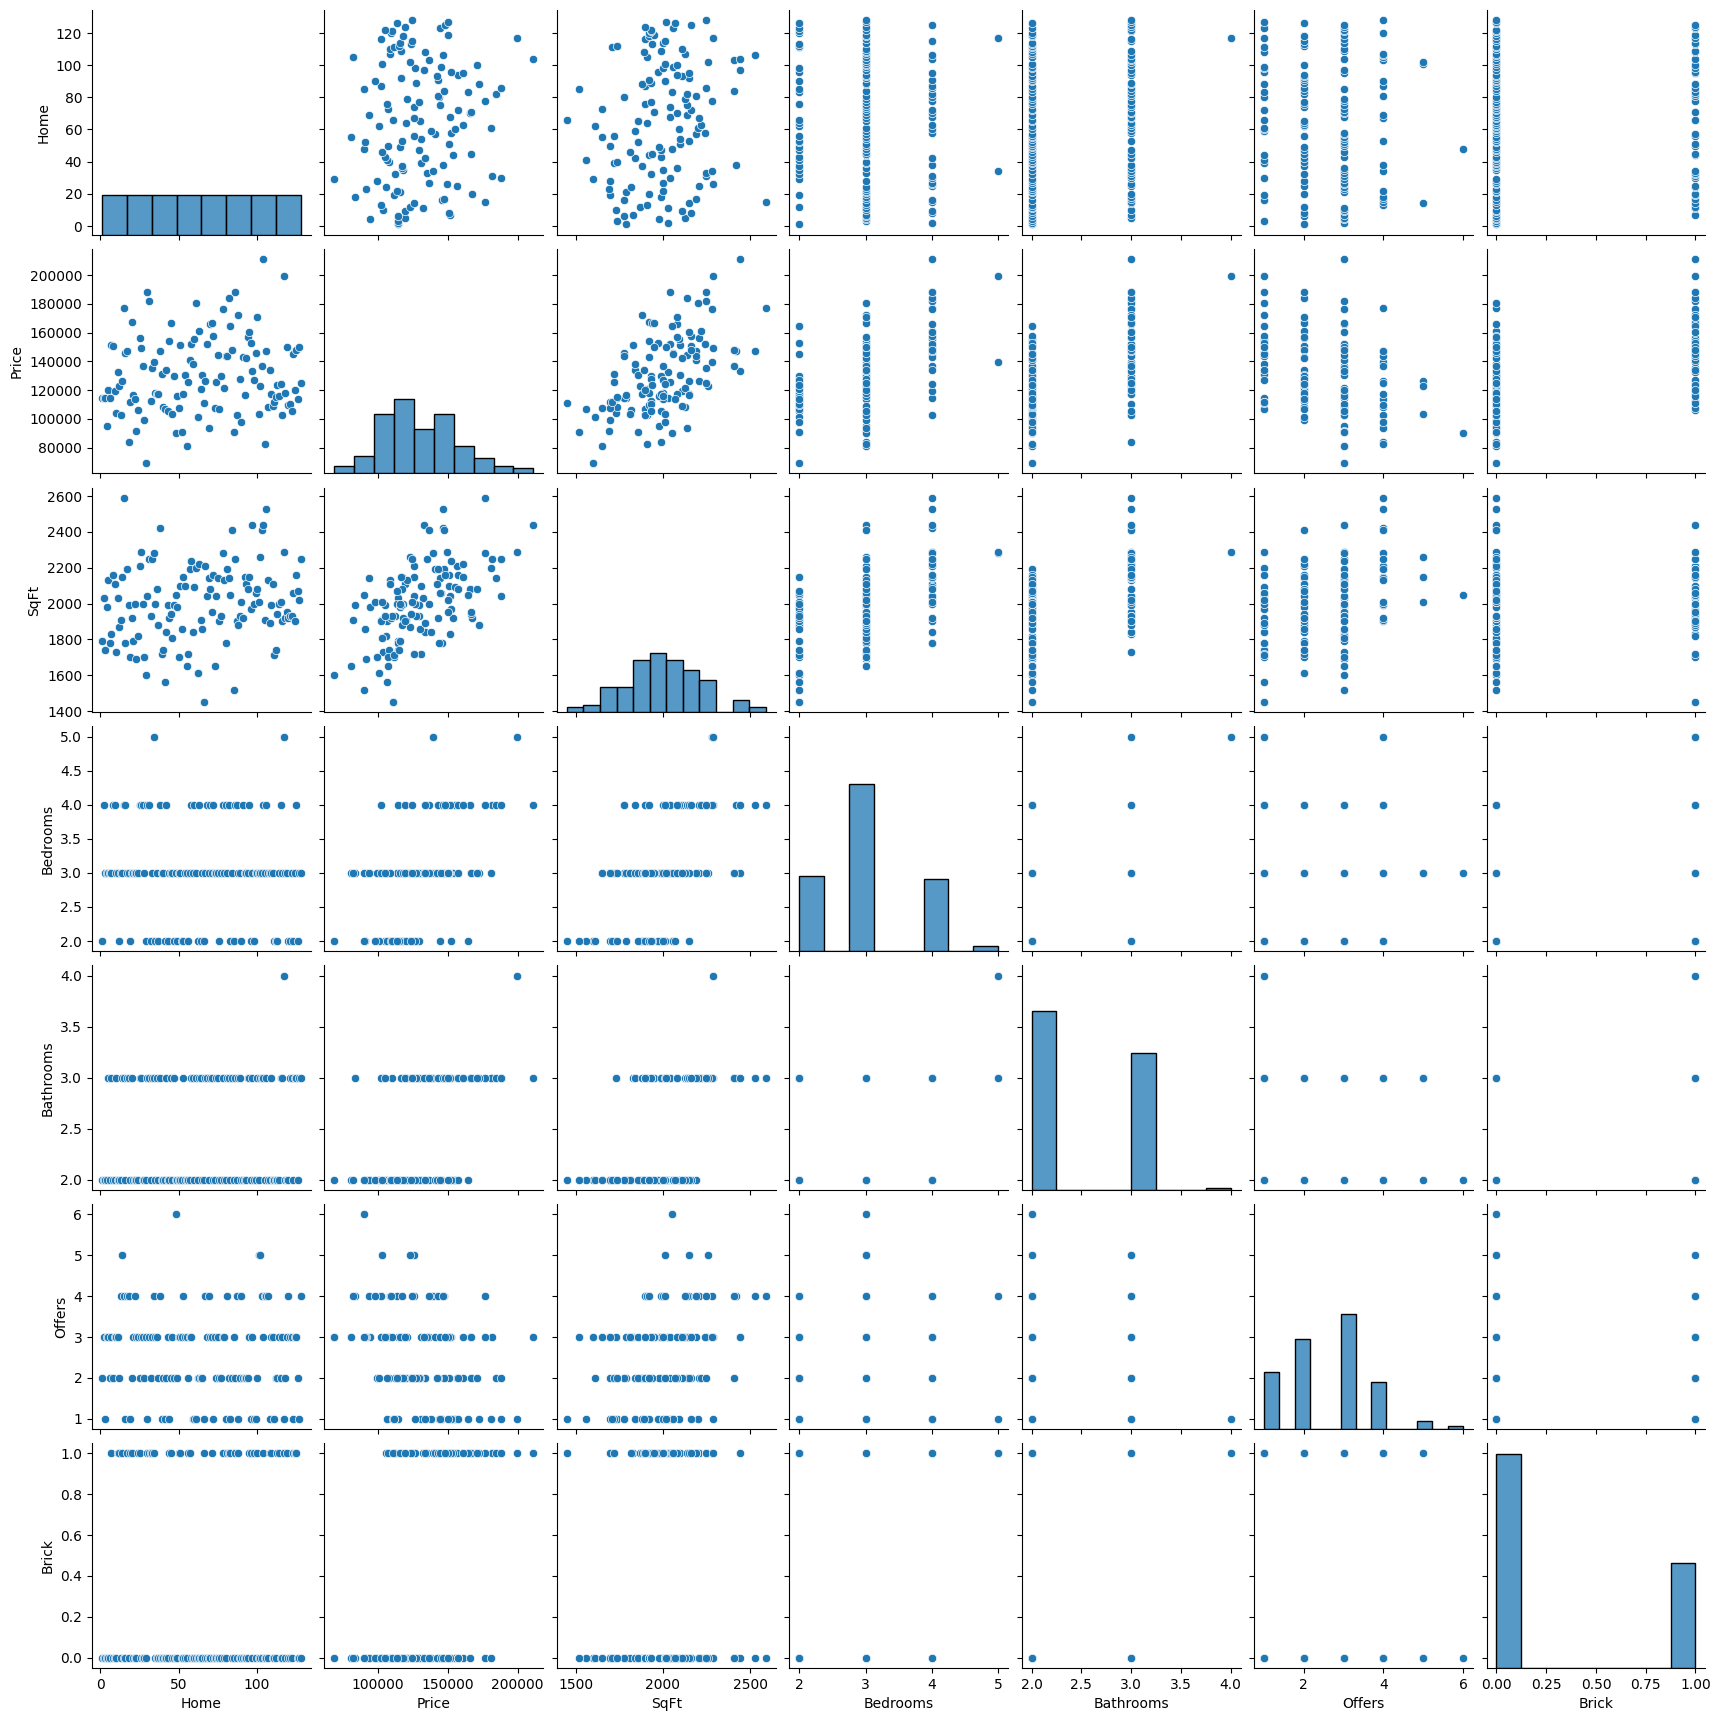

In [25]:
#Initializations and importing raw data for training model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gradio as gr
from sklearn import metrics

raw_data = pd.read_csv('raw_data.csv')
raw_data['Brick'] = raw_data['Brick'].map({'Yes': 1, 'No': 0})
raw_data.info()
sns.pairplot(raw_data)

<Axes: ylabel='SqFt'>

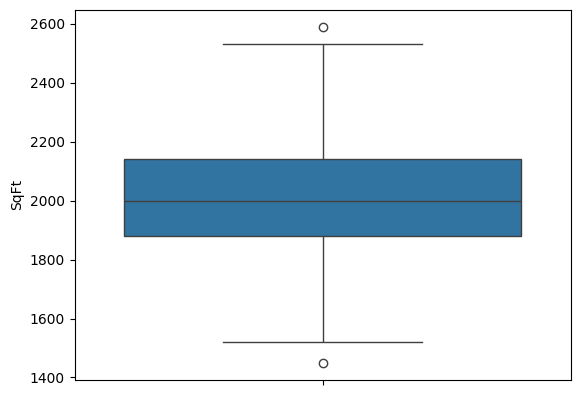

In [26]:
sns.boxplot(raw_data['SqFt'])

In [27]:
#Identifying and removing outliers

upper_limit = raw_data['SqFt'].mean() + 2.6*raw_data['SqFt'].std()
lower_limit = raw_data['SqFt'].mean() - 2.6*raw_data['SqFt'].std()
print (f'The upper limit of usable data is: {upper_limit}')
print (f'The lower limit of usable data is: {lower_limit}')
data = raw_data.loc[(raw_data['SqFt'] < upper_limit) & (raw_data['SqFt'] > lower_limit)]
print (f'The outliers are: ')
print (f'{raw_data.loc[(raw_data['SqFt'] > upper_limit) | (raw_data['SqFt'] < lower_limit)]}')
x = data[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick']]
y = data['Price']

The upper limit of usable data is: 2551.0258214696732
The lower limit of usable data is: 1450.8491785303265
The outliers are: 
    Home   Price  SqFt  Bedrooms  Bathrooms  Offers  Brick Neighborhood
14    15  176800  2590         4          3       4      0         West
65    66  111100  1450         2          2       1      1        North


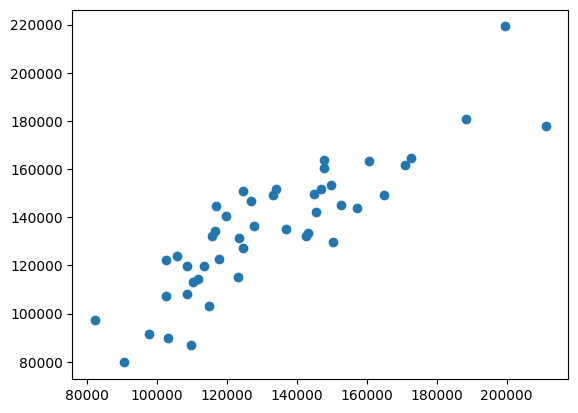

In [28]:
#Training and testing the linear regression model

x_train = x[ :100]
x_test = x[80: ]
y_train = y[ :100]
y_test = y[80: ]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)
plt.scatter(y_test, prediction_test)

In [38]:
#Different metrics for the model

mae = metrics.mean_absolute_error(y_test, prediction_test)
mse = metrics.mean_squared_error(y_test, prediction_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_test))
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Percen_Err = (y_test - prediction_test)/y_test * 100
Abs_Percn_Err = np.abs(Percen_Err)
print (f'Accuracy of the model is: {100 - np.mean(Abs_Percn_Err)}')

Mean Absolute Error: 11829.004773150678
Mean Squared Error: 198096808.6916899
Root Mean Squared Error: 14074.686806166947
Accuracy of the model is: 90.77439427069912


In [30]:
#Defining new function for predicring the price

def predict_price(SqFt, Dedrooms, Bathrooms, Offers, Brick):
    test = np.array([SqFt, Dedrooms, Bathrooms, Offers, Brick]).reshape(1, -1)
    test_df = pd.DataFrame(test, columns = x.columns)
    prediction = model.predict(test_df)
    return prediction
print (f'The predicted price is: {predict_price(2000, 3, 3, 3, 0)}')

The predicted price is: [127349.21998937]


In [31]:
# Creating Gradio interface for the model
inputs = [
    gr.Number(label="SqFt"),
    gr.Number(label="Bedrooms"),
    gr.Number(label="Bathrooms"),
    gr.Number(label="Offers"),
    gr.Radio(['Yes', 'No'], label="Brick", type="index")
]

outputs = gr.Textbox(label="Predicted Price (USD)")

gr.Interface(fn=predict_price, inputs=inputs, outputs=outputs, title="House Price Predictor", description="Predict the price of a house based on its features.").launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://efcfa6973e2c6f9d4b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
